# "Statistics perspective on regression"

> "In a regression analysis, we look for a relationship between two variables. Here, we provide an introduction to linear regression from a statistics point of view with code examples."

- toc: true
- branch: master
- badges: true
- comments: true
- author: Borja Requena
- categories: [Statistics, Data Analysis, Regression, GLMs]
- image: images/regression.png

This post is part of a series in which we provide an introduction to statistics and data analysis introducing [analysis of variance (ANOVA)](https://brequena.com/statistics/data%20analysis/anova/glms/2021/10/05/ANOVA.html) and regression. They contain most of the teaching material developed for the [Msc of Multidisciplinary Research in Experimental Sciences (BIST)](https://mmres.bist.eu/). 

The main goal is to provide an intuition about the main ideas behind the different techniques together with simple code examples that implement them from scratch. 

> Note: We strongly recommend understanding the [ANOVA](https://brequena.com/statistics/data%20analysis/anova/glms/2021/10/05/ANOVA.html) post before moving forward, as most concepts are the exact same. ANOVA and regression are forms of general linear models and, therefore, they are based on the same principles. 

In [ ]:
#hide
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

In a regression analysis we aim to find trends or relationships in our data. In the most basic scenario, we have an explanatory variable $x$ which we expect to have some influence over a response variable $y$ and the goal is to find the relationship between them. The explanatory variables can either be continuous or categorical, but the response variable is always continuous. Furthermore, the relationship between the two variables can be an arbitrarily complex function $y(x)$, although in most applications it is a smooth function.

In this introductory post we will start by considering a single explanatory continuous variable and a linear relationship of the form $y=\alpha+\beta x$, which is known as **linear regression**. 

## Linear regression

As we have briefly introduced above, in a linear regression setting we only have a single explanatory variable $x$ that follows a linear relationship with the response variable $y$ of the form $y=\alpha+\beta x$. A linear regression, while being the most simple form of regression, allows us to identify general trends in our data. Furthermore, any smooth function can be approximated by a straight line over a sufficiently short range. Therefore, in an extreme case, we can approximate any function by a series of linear regressions (not recommendable). 

As in [ANOVA](https://brequena.com/statistics/data%20analysis/anova/glms/2021/10/05/ANOVA.html), the true values $\alpha$ and $\beta$ are inaccessible and the best we can do is to estimate them from our data, obtaining the coefficients $a, b$ such that $y\approx a+bx$. Below, we show two examples of linear regression using synthetic data with $\alpha=1, \beta=-1$ and different degrees of noise. The black lines indicate the true relationship $y=\alpha + \beta x$ and the red lines show the best estimation $y=a+bx$. 

In [ ]:
def line(x, a, b):
    "Evaluates `a + x*b`"
    return a + x*b

def synthetic_data(x, intercept, slope, std):
    "Create a noisy synthetic dataset."
    return line(x, intercept, slope) + std*np.random.randn(len(x))

In [ ]:
np.random.seed(7) # Set random seed for reproducibility
n = 20
x = np.linspace(-1, 1, n)
a, b = 1, -1
std_easy, std_hard = 0.1, 1.2
datasets = synthetic_data(x, a, b, std_easy), synthetic_data(x, a, b, std_hard)

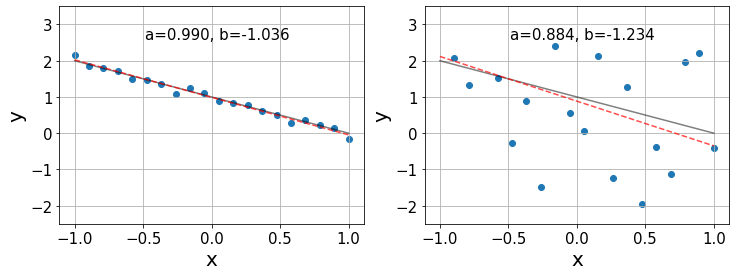

In [ ]:
#collapse-hide
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
exact_relation = line(x, a, b)
for ax, ds in zip(axes, datasets):
    ax.scatter(x, ds)
    ax.plot(x, exact_relation, color='k', alpha=0.5)
    b_est, a_est = np.polyfit(x, ds, 1)
    ax.plot(x, line(x, a_est, b_est), color='r', linestyle='--', alpha=0.7)
    ax.grid()
    ax.tick_params(labelsize=15)
    ax.set_ylim(-2.5, 3.5)
    ax.text(-0.49, 2.6, f"a={a_est:.3f}, b={b_est:.3f}", fontsize=15)
    ax.set_ylabel("y", fontsize=20)
    ax.set_xlabel("x", fontsize=20);

In the left plot, we see that the estimates $a,b$ are pretty accurate, given that the data follows a nearly perfect linear relationship. However, in the right plot the linear relationship is not so clear and we only find a generic trend on the data. Consequently, in this last case, the relative errors in the estimation of the coefficients is an order of magnitude larger than in the previous case. 

### Finding the best fit

Now that we have built some intuition about he problem, let us dive into the details of how we find the previous red lines. The best fit is the line that minimizes the sum of all errors to our data points. However, the deviations from the line $y_i-y(x_i)$ can take positive and negative values, as in the calculation of the variance in [ANOVA](https://brequena.com/statistics/data%20analysis/anova/glms/2021/10/05/ANOVA.html). Hence, we quantify the error by the sum of squares (SS) of the deviations $$SS = \sum_{i=1}^n (y_i-y(x_i))^2,$$ where $y(x_i)$ indicates the prediction of the fit line at the point $x_i$. The minimization of the SS gives the name to the algorithm: **least squares**.

In practice, this optimization is usually performed by derivating $SS$ with respect to the function parameters and setting the equations to zero, as in [this example](https://en.wikipedia.org/wiki/Linear_least_squares#Example). In this case, we would solve the system of equations
$$
\begin{align}
\frac{\partial SS}{\partial a} &= 2\left(na - \sum_{i=1}^n y_i - bx_i\right) = 0 \\
\frac{\partial SS}{\partial b} &= -2\sum_{i=1}^n x_i(y_i-a-bx_i) = 0
\end{align}
$$
considering that every term in the $SS$ can be expressed as $(y_i-a-bx_i)^2$.

In [ ]:
x = np.linspace(-1, 1, n)
std = 0.2
ds = synthetic_data(x, a, b, std)
b_est, a_est = np.polyfit(x, ds, 1)
fit = line(x, a_est, b_est)

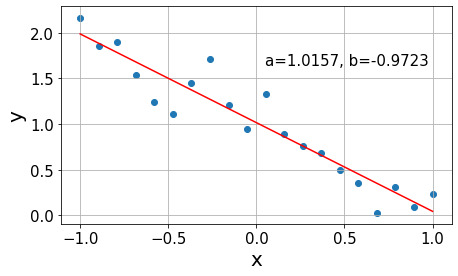

In [ ]:
#collapse-hide
plt.figure(figsize=(7, 4))
plt.scatter(x, ds)
plt.plot(x, fit, color='r')
plt.grid()
plt.text(0.05, 1.65, f"a={a_est:.4f}, b={b_est:.4f}", fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel("y", fontsize=20)
plt.xlabel("x", fontsize=20);

### Regression analysis
#### ANOVA

In order to perform the analysis, we can understand the optimization process in a different way: 

As in ANOVA, we start by fitting the grand mean of the data $\bar{y}$. This results into a flat line of the form $y=\bar{y}$ from which the deviations of all points add up to zero. We quantify the error arround the mean with the previously introduced $SS_{total}$ from ANOVA, which we denote as **$SSY$** as we shift towards a more general notation. 

Then, we rotate the line around the mean coordinate $(\bar{x}, \bar{y})$ until we find the one that minimizes the error. Rotating the line, we bring it closer to the data points reducing the overall deviations. Nevertheless, there will still be some variability left to be explained, unless the data follows a perfect line, which we refer to as the error SS denoted **$SSE$**. This is the equivalent quantity to the $SS_{within}$ introduced in ANOVA, which quantifies the error between our fit and the datapoints. 

The difference between $SSY$ and $SSE$ is the variability captured by the regression, denoted **$SSR$** (analogous to $SS_{between}$) which quantifies the distance between the grand mean and the fit. Hence, these quantities follow the relationship $$SSY = SSR + SSE$$ 

In the plots below we illustrate the distances quantified by each of the terms in a new synthetic dataset.

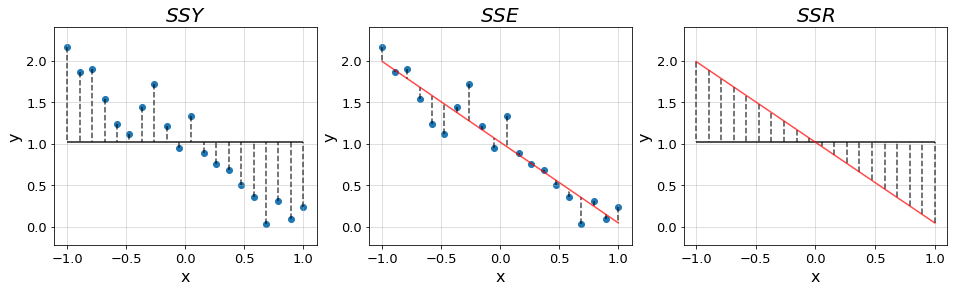

In [ ]:
#collapse-hide
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Total SS
grand_mean = ds.mean()
axes[0].scatter(x, ds)
axes[0].hlines(grand_mean, x[0], x[-1], alpha=0.9)
axes[1].scatter(x, ds)
axes[1].plot(x, fit, color='r', alpha=0.7)
axes[2].plot(x, fit, color='r', alpha=0.7)
axes[2].hlines(grand_mean, x[0], x[-1], alpha=0.9)
for xi, yi, fi in zip(x, ds, fit):
    axes[0].vlines(xi, yi, grand_mean, linestyles='--', alpha=0.7)
    axes[1].vlines(xi, yi, fi, linestyles='--', alpha=0.7)
    axes[2].vlines(xi, fi, grand_mean, linestyles='--', alpha=0.7)
axes[0].set_title(r"$SSY$", fontsize=20)
axes[1].set_title(r"$SSE$", fontsize=20)
axes[2].set_title(r"$SSR$", fontsize=20)

for ax in axes:
    ax.set_ylim(-0.22, 2.4)
    ax.tick_params(labelsize=13)
    ax.set_ylabel("y", fontsize=16)
    ax.set_xlabel("x", fontsize=16)
    ax.grid(alpha=0.5)

In order to perform the proper statistical analysis, we have to take into account the partition of the degrees of freedom (DF). For a dataset with $n$ points, we have $(n-1)$ DF for $SSY$ as we know that the deviations are subject to the constraint of adding up to zero. This way, if we know the value of $(n-1)$ deviations, we can infer the value of the last one.

For $SSR$ we have two DF $a, b$. However, since we have the constraint that the line must go through the mean point $(\bar{x}, \bar{y})$, finding one parameter immediately sets the other and, therefore, we only have one DF. Hence, there are $n-2$ remaining DF for $SSE$ corresponding to the original $n-1$ DF minus a regression coefficient. This last one can also be understood as that we lose two degrees of freedom estimating $a, b$ from the $n$ data points.

With these quantities, we can perform the ANOVA of our regression. 

In [ ]:
#collapse-hide
grand_mean = ds.mean()
sse = np.sum((ds - fit)**2)
ssr = np.sum((fit - grand_mean)**2)
dfe, dfr = n-2, 1
mse, msr = sse/dfe, ssr/dfr
f_ratio = msr/mse
print(f"F-ratio of {f_ratio:.4f}.")

F-ratio of 151.2594.


Promising F-ratio! Seems like a good fit, we just need to check a couple more things :)

#### R-squared

With the same quantities used for the ANOVA, we can compute the **$R^2$** metric. The $R^2$ quantifies the fraction of variability explained by the resulting fit $$R^2 = \frac{SSY-SSE}{SSY} = \frac{SSR}{SSY}.$$ In the case of a perfect fit, $SSE=1$ and $R^2=1$. Hence, values of $R^2$ close to one are indicative of a good fit, while small values may suggest that there are other important variables besides $x$ influencing $y$. 

In [ ]:
#collapse-hide
ssy = np.sum((ds - grand_mean)**2)
r_sq = ssr/ssy
print(f"R^2={r_sq:.4f}")

R^2=0.8937


Quite high $R^2$ means that most of the variance in the data is captured by our regression. Very good fit! 

#### Significant relationships

Once we estimate our coefficients $a,b$ we have to address the question of whether the relationship that we have found is statistically relevant. The strength of the relationship is determined by the resulting slope and so we want to know what are the odds that the obtained slope could have simply happened by chance alone. 

This way, we formulate our null hypothesis of no relationship $\beta=0$, as it is quite natural to assume that there is no relationship until the evidence shows otherwise. Then, we compute the standard error of our slope estimation $\varepsilon_b$, with which we can check how many standard deviations lie between our estimation from the null hypothesis $t=b/\varepsilon_b$. Finally, we can perform a t-test and accept or reject the null hypothesis accordingly.    

The standard error of the slope is obtained as $\varepsilon_b=\sqrt{\frac{MSE}{SSX}}$, where $MSE=SSE/DFE$ and $SSX=\sum_{i=1}^n (x_i - \bar{x})^2$.

In [ ]:
from scipy.stats import t

In [ ]:
#collapse-hide
ssx = np.sum((x - x.mean())**2)
eb = np.sqrt(mse/ssx)
t_val = b_est/eb
t_ratio = t.pdf(t_val, df=dfe)
print(f"t-ratio {t_ratio:.2e} for {t_val:.2f} standard deviations away from null hypothesis")

t-ratio 2.23e-10 for -12.30 standard deviations away from null hypothesis


More regression on next session ;) 